# Kukkonen-Overhauser (KO) Interaction

In this note, we explore some properties of the Kukkonen-Overhauser ansatz of the electron-electron interaction.

## Overview
Assume many electrons interact through a charge-charge interaction $v_q^+$ and a spin-spin interaction $v_q^-$. Below the scale of the Fermi energy/Fermi momentum, the bare interaction gets renormalized by the particle-hole excitations. The renormalized interaction is captured by an ansatz called the KO interaction,
$$
W_{KO}^{\pm}=\frac{v_q^\pm+f_q^\pm}{1-(v_q^\pm+f_q^\pm)\Pi_0}+\delta f_q^\pm,
$$
where $f_q^\pm$ are the vertex correction. There are two ways to parameterize it,

- __Phenomenological ansatz (the original KO ansatz)__: $f_q^\pm$ is approximated by the exchange-correlation kernel, $\Pi_0$ is the polarization of free electrons with the bare mass.

- __First-principle ansatz (Fermi liquid theory based)__: $f_q^\pm$ is defined as the finite-momentum generalization of the Landau quasiparticle interaction $$\lim_{q\rightarrow 0} f_q^\pm = F^\pm/N_F,$$and $\Pi_0$ is the polarization of free electrons with the renormalized mass (for the Coulomb gas, it is roughly the same as the bare mass). This approach exactly reproduce the Fermi liquid theory in the small momentum limit.

When two electron collides, they may effectively interact through a direct KO interaction, or an exchanged KO interaction. This two contributions double counts the underlying many-body effects. To subtract the double countted contributions, a counterterm $\delta f^\pm$ is needed. Again, there are different options:

- __Phenomenological ansatz (the original KO ansatz)__: $$\delta f_q^\pm = -f_q^\pm$$. We refer the reader to the original paper  https://journals.aps.org/prb/abstract/10.1103/PhysRevB.20.550 for the motivation.

- __First-principle ansatz(Fermi liquid theory based)__: Alternatively, one may require that the scattering amplitude of two electrons by exchanging the KO interaction exactly reproduce the Landau Fermi liquid predictions. This requirement serves as a renormalization condition for deriving the double counted contribution.

Note that by including the high-order contributions in terms of renormalized Feynman diagrams, both approaches lead to the physical answer. The key difference is that at the tree level approximation, the phenomological ansatz violates the Fermi liquid theory in the small momentum limit, while the first-principle approach doesn't.

In this note, we will study the phenomenological KO interaction. We will focus on the Coulomb gas system, where $v_q^+$ is the Coulomb interaction, while $v_q^-$ is set to zero. Both $f_q^+$ and $f_q^-$ are negative valued.

In [1]:
using ElectronGas
using GreenFunc, CompositeGrids
using LaTeXStrings
using Plots, Parameters

In [2]:
beta = 1000.0
rs = 5.0
Fp = -1
#Fm = -0.5
d = 3
para=Parameter.rydbergUnit(1/beta, rs, d; Λs=1e-8);
NF = Polarization.Polarization0_ZeroTemp(0.0, 0, para)*para.spin;
@unpack kF, β = para
para

ElectronGas.Parameter.Para
  WID: Int64 1
  dim: Int64 3
  spin: Int64 2
  ϵ0: Float64 0.07957747154594767
  e0: Float64 1.4142135623730951
  me: Float64 0.5
  EF: Float64 0.14732674209411462
  β: Float64 6787.633974565082
  μ: Float64 0.14732674209411462
  Λs: Float64 1.0e-8
  Λa: Float64 0.0
  gs: Float64 1.0
  ga: Float64 0.0
  beta: Float64 1000.0
  Θ: Float64 0.001
  T: Float64 0.00014732674209411463
  n: Float64 0.0019098593171027432
  Rs: Float64 5.0
  a0: Float64 0.9999999999999998
  rs: Float64 5.000000000000001
  kF: Float64 0.38383165853550255
  espin: Float64 1.4142135623730951
  e0s: Float64 1.4142135623730951
  e0a: Float64 1.4142135623730951
  NF: Float64 0.01944513898110937
  ωp: Float64 0.30983866769659335
  qTF: Float64 0.6990777111084904


In [3]:
#warning: take a minute or so
sigma_dyn, sigma_ins = SelfEnergy.G0W0(para, minK = 1e-6, Nk=12, order=4, int_type=:ko);
sigma_ωn = sigma_dyn |> to_dlr |> to_imfreq;
wgrid, kgrid = sigma_ωn.mesh
dlr = wgrid.representation
ωn_grid = wgrid.representation.ωn;
kFidx = searchsortedfirst(kgrid.grid, para.kF);

### 1.1 Frequency-dependent Self-energy (dynamic part only)

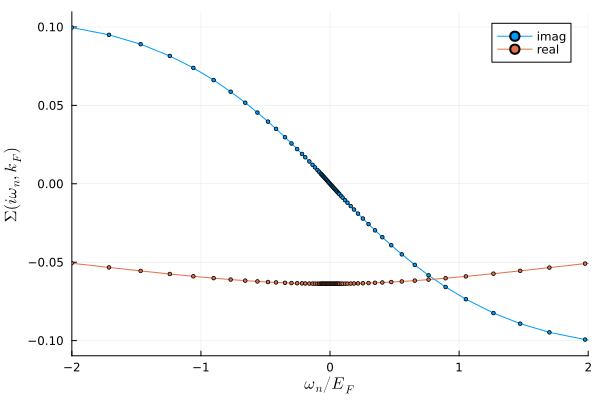

In [4]:
plot(ωn_grid/para.EF, imag(sigma_ωn[:, kFidx]),marker=2, label="imag", xlabel=L"$\omega_n/E_F$", ylabel=L"$\Sigma(i\omega_n, k_F)$", xlims=(-2, 2))
plot!(ωn_grid/para.EF, real(sigma_ωn[:, kFidx]),marker=2, label="real")

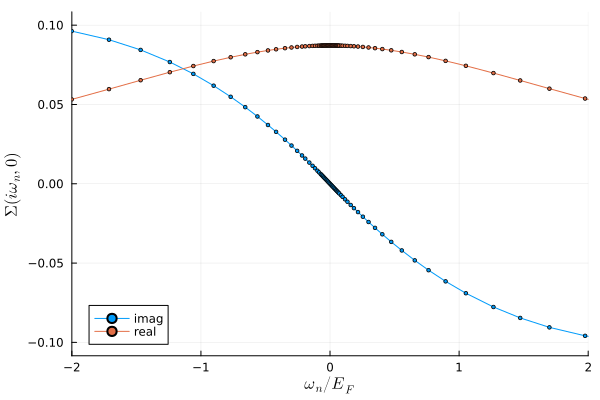

In [5]:
plot(ωn_grid/para.EF, imag(sigma_ωn[:, 1]),marker=2, label="imag", xlabel=L"$\omega_n/E_F$", ylabel=L"$\Sigma(i\omega_n, 0)$", xlims=(-2, 2))
plot!(ωn_grid/para.EF, real(sigma_ωn[:, 1]),marker=2, label="real")

### 1.2 Momentum-dependent Self-energy (instant + dynamic)

63


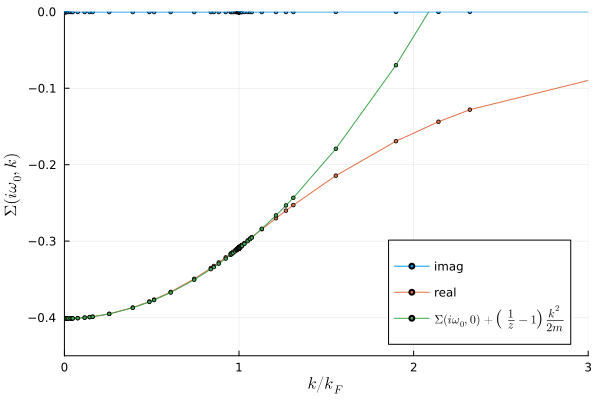

In [6]:
w0_idx = searchsortedfirst(dlr.n, 0)
println(w0_idx)
sig = sigma_ωn[w0_idx, :] .+ sigma_ins[1, :]
plot(kgrid.grid/para.kF, imag(sig), marker=2, label="imag", xlabel=L"$k/k_F$", ylabel=L"$\Sigma(i\omega_0, k)$", ylims=[-0.45, 0.0], xlims=[0.0, 3], legend =:bottomright)
plot!(kgrid.grid/para.kF, real(sig), marker=2, label="real")
x = kgrid.grid
z, _ = SelfEnergy.zfactor(para, sigma_ωn)
plot!(x/para.kF, x.^2/(2*para.me)*(1/z-1).+real(sig[1]), marker=2, label=L"$\Sigma(i\omega_0, 0)+\left(\frac{1}{z}-1\right)\frac{k^2}{2m}$")

### 1.3 Z-factor and Effective mass

Quasiparticle effective mass can be extracted from the quasiparticle propagator,
$$G(k, i\omega)=\frac{-1}{i\omega-k^2/{2m}+\mu-\Sigma(k, i\omega)}$$
Near the Fermi surface, 
$$Re\Sigma(k, i\omega)=Re\Sigma(k_F, 0)+\frac{\partial Re\Sigma(k_F, 0)}{\partial k} (k-k_F) + ...$$
and,
$$Im\Sigma(k, i\omega)=Im\Sigma(k_F, 0^+)\cdot \text{sgn}(\omega)+\frac{\partial Im\Sigma(k_F, 0^+)}{\partial \omega}\cdot \omega  + ...$$
so that the quasiparticle propagator is renormalized to the form,
$$G(k, i\omega) = \frac{-z}{i\omega-v_F^*(k-k_F)+i\eta \cdot \text{sgn}(\omega)}$$
the wave-function renormalization factor,
$$z=\frac{1}{1-\frac{\partial Im\Sigma(k_F, 0^+)}{\partial \omega}}=\lim_{T\rightarrow 0} \frac{1}{1-\frac{\Sigma(i\omega_2, k_F)-\Sigma(i\omega_1, k_F)}{i2\pi T}}$$
and the quasiparticle life time,
$$\eta = z\cdot Im\Sigma(k_F, 0^+)$$
and the effective mass,
$$\frac{m}{m^*}=z \cdot \left(1+\frac{m}{k_F}\frac{\partial Re\Sigma(k_F, 0)}{\partial k}\right)$$

rs = 5.000000000000001 has Z factor = 0.6157944148918584


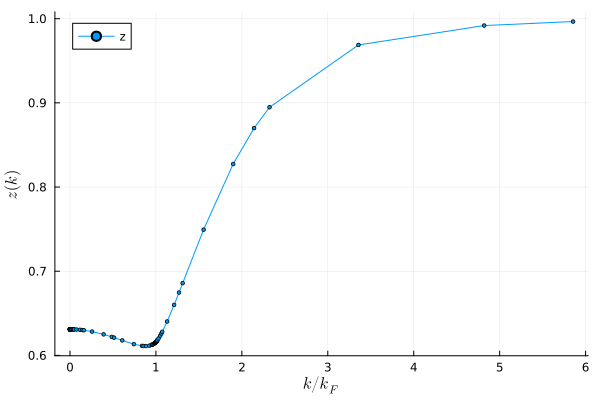

In [7]:
w0idx = searchsortedfirst(dlr.n, 0)
zfactor_ωnn = @. 1 / (1 - imag(sigma_ωn[w0idx+1, :]-sigma_ωn[w0idx, :]) / (2π) * para.β)
zfactor = zfactor_ωnn[kFidx]
println("rs = $(para.rs) has Z factor = ", zfactor)
plot(kgrid.grid/para.kF, zfactor_ωnn,marker=2, label="z", xlabel=L"$k/k_F$", ylabel=L"$z(k)$")

In [9]:
#take a few minutes
rslist = [0.5, 1.0, 2.0,  4.0,  5.0, 10.0]
for _rs in rslist
    param = Parameter.rydbergUnit(1.0/beta, _rs, d)
    @unpack me, β, kF = param
    sigma = SelfEnergy.G0W0(param, minK = 1e-7, Nk=16, order=6, int_type=:ko);
    sigma_wn = sigma_dyn |> to_dlr |> to_imfreq;

    z, _ = SelfEnergy.zfactor(param, sigma_wn)
    mratio, _ = SelfEnergy.massratio(param, sigma_dyn, sigma_ins)

    println("rs = $_rs => $z, with m*/m = $mratio")
end

rs = 0.5 => 0.9254209347195242, with m*/m = 0.9594771857773865 + 1.0497815429393292e-12im
rs = 1.0 => 0.8661201328044956, with m*/m = 0.955095445176057 - 6.09298888949683e-11im
rs = 2.0 => 0.7756939406151291, with m*/m = 0.9607265138961804 + 6.864972862466625e-11im
rs = 4.0 => 0.6576399586124808, with m*/m = 0.9753443743538741 + 1.1765345373866195e-10im
rs = 5.0 => 0.6157843939402743, with m*/m = 0.9804024330481794 + 1.626293176110433e-10im
rs = 10.0 => 0.48083139490608007, with m*/m = 0.9920243323267623 + 6.77432029331094e-11im
